# Levetid og systempålitelighet

*Merk*: Temaene levetid, weibullfordeling og systempålitelighet er ikke tilstrekkelig dekket i læreboka. Dette notatet kan brukes som et supplement. 

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

## Levetid og pålitelighet

Vi representerer levetid (til et produkt, en komponent, en prosess, et system, etc.) som en stokastisk variabel $T$. Sannsynligheten for at levetiden er mindre enn en tid $t$ er dermed gitt ved $F(t) = P(T\leq t)$, der $F(t)$ representerer den kumulative fordelingen til $T$. Forventet levetid $\text{E}(T)$ kalles gjerne "mean time to failure" og forkortes MTTF. 

> **Definisjon**: Pålitelighetsfunksjonen $R(t) = 1 - F(t)$

Sannsynligheten for at levetiden er lengre enn en tid $t$ er $R(t) = 1 - F(T)$. Her har vi innført en ny notasjon $R(t)$, der $R$ står for "reliability" på engelsk, eller pålitelighet på norsk. 

> **Definisjon**: Sviktrate $h(t) = \frac{f(t)}{R(t)}$
 
Sviktraten, antall feil per tidsenhet ved tid $t$, kan også kalles hasardrate, og på engelsk bruker man gjerne utrykkene "failure rate" og "hazard rate". Sviktraten for de vanligste levetidsfordelingene presenteres under. 

Levetider kan modelleres med en rekke ulike sannsynlighetsfordelinger, og to sentrale fordelinger er eksponensialfordelingen og Weibullfordelingen. 

## Eksponensialfordelingen

Eksponensialfordelingen kjenner vi som tiden mellom hendelser i en Poissonprosess, og som et spesialtilfelle tid frem til *første* hendelse (her er første hendelse synonymt med svikt). For eksponensialfordelingen så er $$f(t) = \lambda e^{-\lambda t},$$ og $$F(T) = 1 - e^{-\lambda t},$$ slik at $$R(t) = e^{-\lambda t}.$$ Forventet levetid, MTTF, er $$\text{E}(T) = 1/\lambda.$$ Sviktraten er $$h(t) = \lambda,$$ som er uavhengig av tiden $t$. 

Uansett hvor lenge en komponent med eksponensialfordelt levetid har fungert, så holder sviktraten seg konstant. Hvis komponenten har fungert i 2 år, så er det like stor sjanse for at den svikter i løpet av den neste måneden, som om komponenten var helt ny. Produkter med eksponensialfordelt levetid trenger ikke å byttes ut før de svikter.

<function matplotlib.pyplot.show(close=None, block=None)>

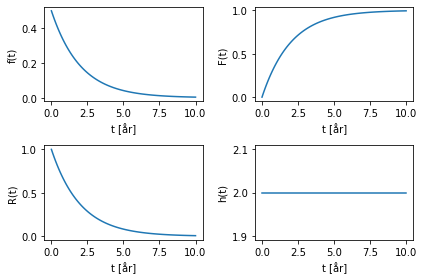

In [2]:
lam = 2
tid = np.linspace(0,10,100)
ft = stats.expon.pdf(tid,scale = lam)
Ft = stats.expon.cdf(tid,scale = lam)
ht = [lam]*100

plt.subplot(2, 2, 1)
plt.plot(tid, ft); plt.ylabel('f(t)'); plt.xlabel('t [år]')

plt.subplot(2, 2, 2)
plt.plot(tid, Ft); plt.ylabel('F(t)'); plt.xlabel('t [år]')

plt.subplot(2, 2, 3)
plt.plot(tid, 1 - Ft); plt.ylabel('R(t)'); plt.xlabel('t [år]')

plt.subplot(2, 2, 4)
plt.plot(tid, ht); plt.ylabel('h(t)'); plt.xlabel('t [år]')

plt.tight_layout(); plt.show

## Weibullfordelingen
Weibullfordelingen er en generalisering av eksponensialfordelingen som lar oss modellere komponenter med økende eller synkende sviktrater. Fordelingen beskrives av to parametere $\lambda$ og $\alpha$. Den kumulative fordelingsfunksjonen i Weibullfordelingen er $$F(t) = 1 - e^{-(\lambda t)^{\alpha}}$$ og sannsynlighetstettheten er gitt ved $$f(t) = \alpha \lambda (\lambda t)^{\alpha -1} e^{-(\lambda t)^{\alpha}}.$$ Pålitelighetsfunksjonen er $$ R(t) = e^{-(\lambda t)^{\alpha}},$$ og sviktraten blir dermed $$h(t) = \alpha \lambda (\lambda t)^{\alpha - 1}.$$

Dersom $\alpha < 1$ er sviktraten avtagende ("barnesykdommer"), dersom $\alpha = 1$ er sviktraten konstant (eksponensialfordeling) og dersom $\alpha > 1$ er sviktraten økende ("slitasje"). Noen eksempler er gitt i figurene under. Du kan endre på python-koden for å studere flere situasjoner.

<function matplotlib.pyplot.show(close=None, block=None)>

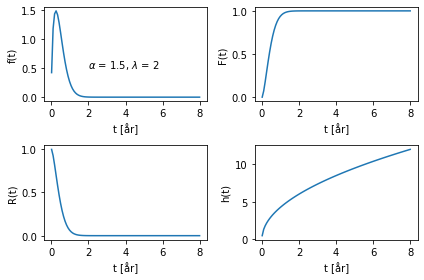

In [3]:
#lam = 2; a = 0.8 # lambda og alpha, minkende sviktrate
lam = 2; a = 1.5 # økende sviktrate
#lam = 2; a = 1 # konstant sviktrate (eksponensial)

tid = np.linspace(0.01,8,100)
ft = (a*lam)*(np.power(lam*tid,a-1))*np.exp(-np.power(lam*tid,a))
Ft = 1 - np.exp(-np.power(lam*tid,a))
Rt = np.exp(-np.power(lam*tid,a))
ht = a*lam*np.power(lam*tid,(a-1))


plt.subplot(2, 2, 1)
plt.plot(tid, ft); plt.ylabel('f(t)'); plt.xlabel('t [år]')
plt.text(2, 0.5, r'$\alpha$ = %s, $\lambda$ = %s' % (a, lam))

plt.subplot(2, 2, 2)
plt.plot(tid, Ft); plt.ylabel('F(t)'); plt.xlabel('t [år]')

plt.subplot(2, 2, 3)
plt.plot(tid, Rt); plt.ylabel('R(t)'); plt.xlabel('t [år]')

plt.subplot(2, 2, 4)
plt.plot(tid, ht); plt.ylabel('h(t)'); plt.xlabel('t [år]')

plt.tight_layout(); plt.show

### Forventning og varians i Weibullfordelingen
Forventning og varians til en Weibull-fordelt levetidsvariabel $T$ er gitt ved $$E(T) = \frac{1}{\lambda} \Gamma(1 + \tfrac{1}{\alpha})$$ og $$\text{Var}(T) = \frac{1}{\lambda^2} \left( \Gamma(1 + \tfrac{2}{\alpha}) - \Gamma(1 + \tfrac{1}{\alpha})^2 \right),$$ der $\Gamma$ representerer den såkalte gamma-funksjonen: $$\Gamma(z) = \int_{0}^{\infty} t^{z-1} e^{-t} dt.$$ For heltall $n = 1, 2, 3, \ldots$ så er $\Gamma(n) = (n-1)!$, men ellers bruker vi programvare for å regne ut integralet numerisk.

In [4]:
# Eksempel:
lam = 2; a = 1.5 # lambda og alpha

E_T = (1/lam)*math.gamma(1 + 1/a)
Var_T = (1/(lam*lam))*(math.gamma(1 + 2/a) - math.gamma(1 + 1/a)* math.gamma(1 + 1/a))
SD_T = math.sqrt(Var_T)

print(round(E_T,2)); print(round(SD_T,2))

0.45
0.31


### Utvidet Weibull-fordeling

Den såkalt *utvidede* Weibull-fordelingen har tre parametere, $\alpha, \lambda, t_0$, og sannsynlighetstetthetsfunksjonen er $$f(t) = \alpha \lambda (\lambda (t-t_0))^{\alpha -1} e^{-(\lambda  (t-t_0))^{\alpha}}.$$ 

I praksis vil lokassjonsparameterenparameteren $t_0$ (ofte også kalt $\gamma$) flytte fordelingen langs tidsaksen, som illustrert i figuren under (endre koden for å studere ulike parameterverdier). Før tid $t_0$ er det dermed ingen sjanse for svikt, men for tid $t \geq t_0$ vil levetiden følge en ordinær Weibullfordeling med parametere $\alpha$ og $\lambda$. 

(0.0, 5.0)

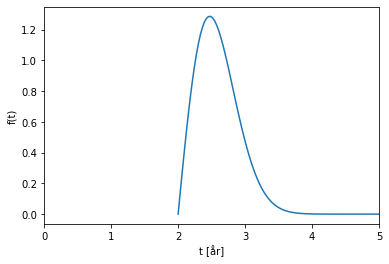

In [5]:
lam = 1.5; a = 2 # økende sviktrate
t0 = 2
#t0 = 0
#t0 = 1

tid = np.linspace(t0,5,100)
ft = (a*lam)*(np.power(lam*(tid-t0),a-1))*np.exp(-np.power(lam*(tid-t0),a))

plt.plot(tid, ft); plt.ylabel('f(t)'); plt.xlabel('t [år]')
plt.xlim(0,5)

# Systempålitelighet

Ofte er vi interessert i systemer som består av flere ulike komponenter. Har skal vi se bort ifra ytre faktorer som kan påvirke hele systemet på en gang, og heller konsentrere oss om hvordan levetiden til enkle systemer kan bestemmes utifra levetid til hver enkelt komponent. Vi antar at alle komponentene har uavhengig levetid. 

## Seriekobling

Dersom et system kun fungerer når alle de $n$ komponentene i systemet fungerer, så kan vi visualisere systemet som en seriekobling av $n$ komponenter med uavhengige levetider $T_1, T_2, \ldots, T_n$. 

<img src="https://www.math.ntnu.no/emner/IST100x/python_felles/serie.png" alt="drawing" width="400"/>


Sannsynligheten for at komponent $i$ fungerer ved tid $t$ er $R_i(t)$. Sannsynligheten for at hele systemet fungerer ved tid $t$ er $$R(t) = R_1(t) \cdot R_2(t) \cdots R_n(t).$$

### Seriekobling og eksponensialfordeling

Anta at vi har $n$ uavhengige eksponensialfordelte komponenter, som alle har samme sviktrate $\lambda$ og dermed har vi for hver komponent pålitelighetsfunksjon $R_i(t) = e^{-\lambda t}$. Da blir uttrykket for at hele det seriekoblede systemet fungerer ved tid t $$R(t) = R_1(t) \cdot R_2(t) \cdots R_n(t)=e^{-\lambda t}\cdot e^{-\lambda t} \cdots e^{-\lambda t}=e^{-n \lambda t}$$


## Parallellkobling 

I en parallelkobling av komponenter med uavhengige levetider $T_1, T_2, \ldots, T_n$ vil systemet fungere så lenge minst én av komponentene fungerer. Levetiden til systemet blir dermed levetiden til den komponenten som fungerer lengst. 

<img src="https://www.math.ntnu.no/emner/IST100x/python_felles/parallell.png" alt="drawing" width="200"/>


Sannsynligheten for at *alle* komponentene, og dermed systemet, har sviktet innen tid $t$ er gitt ved $$F(t) = F_1(t) \cdot F_2(t) \cdots F_n(t).$$ 

Sannsynligheten for at minst én komponent, og dermed systemet, fungerer ved tid $t$ er (fra komplementsetningen) gitt ved $$R(t) = 1 - F(t) = 1 - F_1(t) \cdot F_2(t) \cdots F_n(t).$$